## Name: Shelmith Nyagathiri Kariuki
## Training: DataFest Kampala
## Date: March 7, 2019

### Introduction

Zindi is the first data science competition platform in Africa. Zindi hosts an entire data science ecosystem of scientists, engineers, academics, companies, NGOs, governments and institutions focused on solving Africa’s most pressing problems.
The data used herein comes from the Data Science Nigeria Loan Prediction challenge,hosted on Zindi, whose details can be found here: "http://zindi.africa/competitions/data-science-nigeria-challenge-1-loan-default-prediction"

*Disclaimer*: This script does not involve any machine learning. The data has been used to train part of the tidyverse package. 

### Load the libraries required


In [1]:
import numpy as np #Used for mathematical computations
import pandas as pd #Used for manipulation of dataframes
import os
import calendar 
import datetime as dt #Used for dealing with dates
import seaborn as sns #Used for generating plots
import matplotlib.pyplot as plt #Used for generating plots
from IPython.display import display #Allows for display of several dataframes or objects
from dplython import  DplyFrame, X, mutate, select, sift, group_by, summarize, DelayFunction, rename

## DplyFrame: Used for converting a dataframe in a format that can be used with Dpthylon
## X: Used when making reference to a variable
## mutate: Used for generating new variables
## select: Used for selecting variables
## sift: Used for selecting observations (same as filter in dplyr)
## group_by: Used for grouping variables
## summarize: Used for generating summary statistics

### Setting display and plot theme

In [2]:
#Setting styles and aesthetics
pd.options.display.max_columns =20
pd.options.display.max_rows =10
pd.options.display.float_format = '{:,.0f}'.format

plt.style.use('ggplot')
#plt.rcParams['figure.figsize'] = (8, 8)
sns.set(font='sans-serif', font_scale=1.5,style = "white")
%config InlineBackend.figure_format = 'svg'


In [3]:
## These code checks the type of functions that are in the dplython package
### import dplython
### dir(dplython)

### Read in the datasets

In [4]:
## traindemographics data
traindemographics = DplyFrame(pd.read_csv("C:/Users/user/Documents/Github/python/Datasets/DSN Zindi LoanDataset/traindemographics.csv",
                                parse_dates=['birthdate']))
display(traindemographics.head(n=5))

## trainprevloans data
trainprevloans = pd.read_csv("C:/Users/user/Documents/Github/python/Datasets/DSN Zindi LoanDataset/trainprevloans.csv",
                            parse_dates=['approveddate','creationdate','closeddate','firstduedate','firstrepaiddate'])
display(trainprevloans.head(n=5))

## trainperf data
trainperf = pd.read_csv("C:/Users/user/Documents/Github/python/Datasets/DSN Zindi LoanDataset/trainperf.csv",
                       parse_dates=['approveddate','creationdate'])
display(trainperf.head(n=5))
 

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3,7,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3,7,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,6,6,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3,7,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22,Savings,8,12,GT Bank,NaN,Permanent,NaN


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,"10,000","13,000",30,2016-09-01 16:06:48,NaN,2016-09-14,2016-09-01 15:51:43
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,"10,000","13,000",30,2017-05-28 14:44:49,NaN,2017-05-30,2017-05-26 00:00:00
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,"20,000","23,800",30,2017-04-26 22:18:56,NaN,2017-04-04,2017-04-26 22:03:47
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,"10,000","11,500",15,2017-04-24 01:35:52,NaN,2017-04-24,2017-04-24 00:48:43
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,"10,000","11,500",15,2017-07-14 21:18:43,NaN,2017-07-03,2017-07-14 21:08:35


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,"30,000","34,500",30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,"15,000","17,250",30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,"20,000","22,250",15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,"10,000","11,500",15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,"40,000","44,000",30,NaN,Good


### Inspect the number of rows and columns of each dataset

In [5]:
print("The %s dataset has %d rows and %d columns" %("traindemographics",traindemographics.shape[0],traindemographics.shape[1]))
print("The %s dataset has %d rows and %d columns" %("trainprevloans",trainprevloans.shape[0],trainprevloans.shape[1]))
print("The %s dataset has %d rows and %d columns" %("trainperf",trainperf.shape[0],trainperf.shape[1]))

The traindemographics dataset has 4346 rows and 9 columns
The trainprevloans dataset has 18183 rows and 12 columns
The trainperf dataset has 4368 rows and 10 columns


### Inspect the column names of each dataset

In [6]:
display(traindemographics.columns)
display(trainprevloans.columns)
display(trainperf.columns)


Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'closeddate',
       'referredby', 'firstduedate', 'firstrepaiddate'],
      dtype='object')

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby',
       'good_bad_flag'],
      dtype='object')

### Handling duplicates

In [7]:
traindemographics = traindemographics.drop_duplicates()
print("The %s dataset has %d rows and %d columns" %("traindemographics",traindemographics.shape[0],traindemographics.shape[1]))


The traindemographics dataset has 4334 rows and 9 columns


### Generating more demographic variables

In [8]:

## Generate gender
gender = np.random.choice(list(["Male","Female"]),size = traindemographics.shape[0],replace=True)
traindemographics["gender"] = gender

## Generate State
state = np.random.choice(list(["Oyo","Bauchi","Enugu","Lagos","Ogun","Kadun"]),size=traindemographics.shape[0],replace=True)
traindemographics["state"]=state

## Age

  ### Convert the data to date format
traindemographics["birthdate"] = pd.to_datetime(traindemographics["birthdate"], format='%Y%m%d')

  ### Generate age
traindemographics["age"] = (pd.to_datetime("20180101", format='%Y%m%d')-traindemographics["birthdate"]).astype('<m8[Y]')
traindemographics["age"] = pd.to_numeric(traindemographics["age"], downcast='integer') 

  ### Checking whether the age variable has actually been converted into an integer

### Generating new variables, based on conditions of another variable

In [9]:
## Age Categories
where = DelayFunction(np.where)

traindemographics = (traindemographics >> 
  mutate(age_category =  where(X.age>=21 and X.age<=30,"21-30",
                         where(X.age>=31 and X.age<=40,"31-40",
                         where(X.age>=41 and X.age<=60,"41-60","")))))

## Tabulate the age categories
(traindemographics >>
      group_by(X.age_category) >>
      summarize(freq =X.age_category.count()) >>
      mutate(perc = ((X.freq/X.freq.sum())*100))>>
      rename(Age_Category = X.age_category,
            Frequency = X.freq,
            Percentage = X.perc))



,Age_Category,Frequency,Percentage
0,21-30,1634,38
1,31-40,2196,51
2,41-60,504,12


### Convert the categorical variables to factor

In [10]:
## Age categories
age_cats = list(["21-30","31-40","41-60"])
traindemographics = (traindemographics >> 
   mutate(age_category = X.age_category.astype("category",categories=age_cats, ordered=True)))

## Bank account type
bank_cats = list(["Current","Savings","Other"])
traindemographics = (traindemographics >>
    mutate(bank_account_type = X.bank_account_type.astype("category", categories=bank_cats,ordered=True)))
#traindemographics.age_category = traindemographics.age_category.astype("category")


C:\Users\user\Anaconda3\lib\site-packages\dplython\later.py:152: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  **self.evaluated_kwargs(original, **kwargs))


### Generating summary statistics for one categorical variables


,Age_Category,freq,perc
0,21-30,1634,38
1,31-40,2196,51
2,41-60,504,12


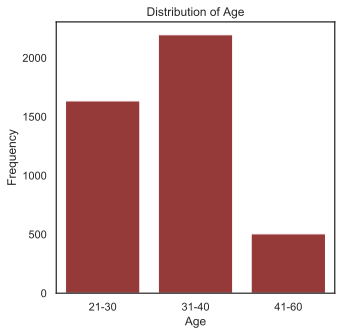

In [11]:
## Generate the summary table
summ_table = (traindemographics >>
             group_by(X.age_category) >>
             summarize(freq = X.age_category.count()) >>
             mutate(perc = (X.freq/X.freq.sum())*100) >>
             rename(Age_Category = X.age_category,
                    freq = X.Frequency,
                    perc = X.perc))
display(summ_table)

## Generate the plot
plt.figure(figsize = (5,5))
sns.set(font='sans-serif', font_scale=1,style = "white")
ax = sns.countplot(x =traindemographics.age_category ,data = traindemographics, color="brown")
ax.set(title = "Distribution of Age",xlabel = "Age",ylabel = "Frequency")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
display(ax)

### Generating summary statistics for several categorical variables


  Bank Accout Type  Frequency
0          Current         56
1          Savings       3414
2            Other        864
AxesSubplot(0.125,0.125;0.775x0.755)
   Gender  Frequency
0  Female       2161
1    Male       2173
AxesSubplot(0.125,0.125;0.775x0.755)
  Age Category  Frequency
0        21-30       1634
1        31-40       2196
2        41-60        504
AxesSubplot(0.125,0.125;0.775x0.755)
    State  Frequency
0  Bauchi        702
1   Enugu        737
2   Kadun        735
3   Lagos        721
4    Ogun        697
5     Oyo        742
AxesSubplot(0.125,0.125;0.775x0.755)


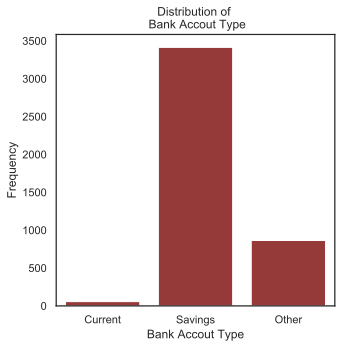

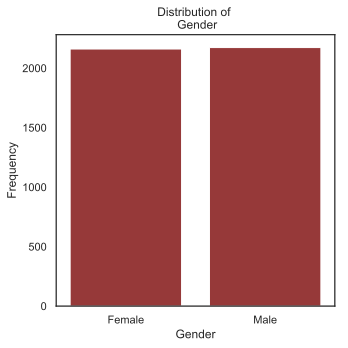

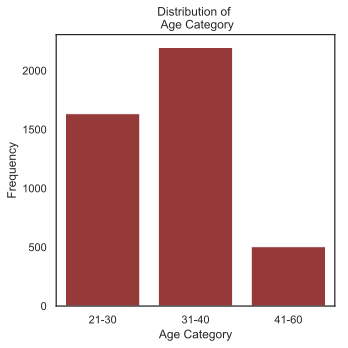

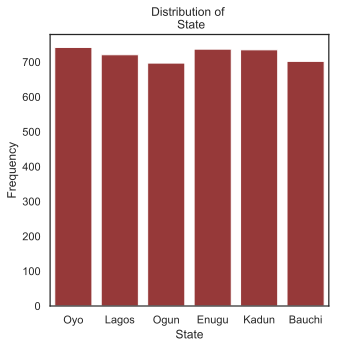

In [12]:
## Create vectors that will hold the variables and their labels

xvar = list(["bank_account_type","gender","age_category","state"])
xlab = list(["Bank Accout Type","Gender","Age Category","State"])


for i in range(len(xvar)):
    ## Write the summary table function
    summ_table = pd.DataFrame(traindemographics.groupby(xvar[i])["customerid"].count().reset_index())
    summ_table.columns = [xlab[i],'Frequency']
    print(summ_table)
    
    ## Write the plot function
    plt.figure(figsize = (5,5))
    sns.set(font='sans-serif', font_scale=1,style = "white")
    ax = sns.countplot(x = xvar[i],data = traindemographics, color = "Brown")
    ax.set(title = "Distribution of \n "+ xlab[i],xlabel = xlab[i],ylabel = "Frequency")
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
    print(ax)
    


### Append the trainprevloans dataset with the trainperf loans dataset


In [13]:
## We want to keep the column names that are in both datasets
variables = trainprevloans.columns[trainprevloans.columns.isin(trainperf.columns)]
variables

## Subset the two datasets, to only contain the selected variables

### trainprevloans
trainprevloans = trainprevloans[variables]
display(trainprevloans.columns)
display(trainprevloans.head(n=5))
display(trainprevloans.shape)

### trainperf
trainperf = trainperf[variables]
display(trainperf.columns)
display(trainperf.head(n=5))
display(trainperf.shape)

## Append the two datasets
trainloans = pd.concat([trainprevloans,trainperf],ignore_index=True)
display(trainloans.head(n=5))
display(trainloans.shape)


Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby'],
      dtype='object')

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,"10,000","13,000",30,NaN
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,"10,000","13,000",30,NaN
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,"20,000","23,800",30,NaN
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,"10,000","11,500",15,NaN
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,"10,000","11,500",15,NaN


(18183, 9)

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby'],
      dtype='object')

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,"30,000","34,500",30,NaN
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,"15,000","17,250",30,NaN
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,"20,000","22,250",15,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,"10,000","11,500",15,NaN
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,"40,000","44,000",30,NaN


(4368, 9)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,"10,000","13,000",30,NaN
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,"10,000","13,000",30,NaN
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,"20,000","23,800",30,NaN
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,"10,000","11,500",15,NaN
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,"10,000","11,500",15,NaN


(22551, 9)

### Merge trainloans with the traindemographics dataset


In [14]:
demo_loans_data=pd.merge(traindemographics, trainloans, how='right', on='customerid',
                sort=True,suffixes=('_x', '_y'))
display(demo_loans_data.head(n=5))
display(demo_loans_data.shape)

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,gender,...,age,age_category,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby
0,8a1088a0484472eb01484669e3ce4e0b,1989-11-09,Savings,3,7,GT Bank,OJUELEGBA,Permanent,Primary,Male,...,28,21-30,301960241,1,2017-07-02 19:19:01,2017-07-02 18:17:53,"10,000","11,500",15,NaN
1,8a1088a0484472eb01484669e3ce4e0b,1989-11-09,Savings,3,7,GT Bank,OJUELEGBA,Permanent,Primary,Male,...,28,21-30,301999397,2,2017-07-27 19:44:08,2017-07-27 18:44:00,"10,000","11,500",15,NaN
2,8a1a1e7e4f707f8b014f797718316cad,1979-10-18,Other,3,7,Standard Chartered,NaN,Permanent,Graduate,Female,...,38,31-40,301620412,1,2016-05-13 15:29:37,2016-05-13 14:29:31,"10,000","13,000",30,NaN
3,8a1a1e7e4f707f8b014f797718316cad,1979-10-18,Other,3,7,Standard Chartered,NaN,Permanent,Graduate,Female,...,38,31-40,301916386,3,2017-05-23 14:21:42,2017-05-23 13:20:30,"20,000","24,500",30,NaN
4,8a1a1e7e4f707f8b014f797718316cad,1979-10-18,Other,3,7,Standard Chartered,NaN,Permanent,Graduate,Female,...,38,31-40,301947045,4,2017-06-21 22:09:51,2017-06-21 21:09:44,"30,000","39,000",60,NaN


(22551, 21)

### Generate different time variables

In [15]:
## Generate year
demo_loans_data['App_Year'] = demo_loans_data['creationdate'].dt.strftime('%Y')
demo_loans_data['App_Year'] = demo_loans_data['App_Year'] .astype('category',ordered=True)

## Generate day of the month
demo_loans_data['App_Day'] = demo_loans_data['creationdate'].dt.strftime('%d')

## Generate day of the week
demo_loans_data['App_DoW'] = demo_loans_data['creationdate'].dt.strftime('%a')
dow_cats = list(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
demo_loans_data['App_DoW'] = demo_loans_data['App_DoW'] .astype('category',categories=dow_cats,ordered=True)
## Generate the hour
demo_loans_data['App_Hour'] = demo_loans_data['creationdate'].dt.strftime('%H')


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until


### Generate a time series graph that shows the number of loans applied.

   Year  Frequency
0  2016       4910
1  2017      17641


C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


   Day of Month  Frequency
0            01        635
1            02        707
2            03        777
3            04        732
4            05        848
..          ...        ...
26           27        749
27           28        889
28           29        680
29           30        668
30           31        322

[31 rows x 2 columns]
  Day of Week  Frequency
0         Mon       3679
1         Tue       3689
2         Wed       3843
3         Thu       3669
4         Fri       3648
5         Sat       2243
6         Sun       1780
   Hour  Frequency
0    00        171
1    01        147
2    02        138
3    03        176
4    04        270
..  ...        ...
19   19        896
20   20        770
21   21        681
22   22        468
23   23        285

[24 rows x 2 columns]


<Figure size 360x360 with 0 Axes>

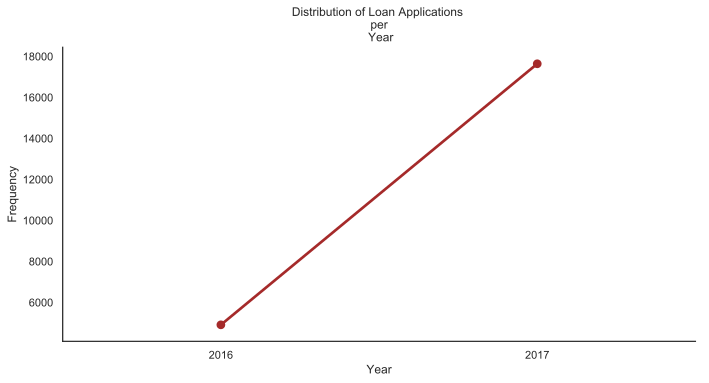

<Figure size 360x360 with 0 Axes>

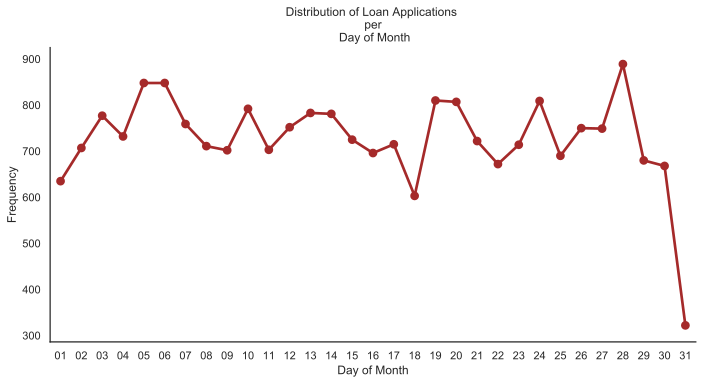

<Figure size 360x360 with 0 Axes>

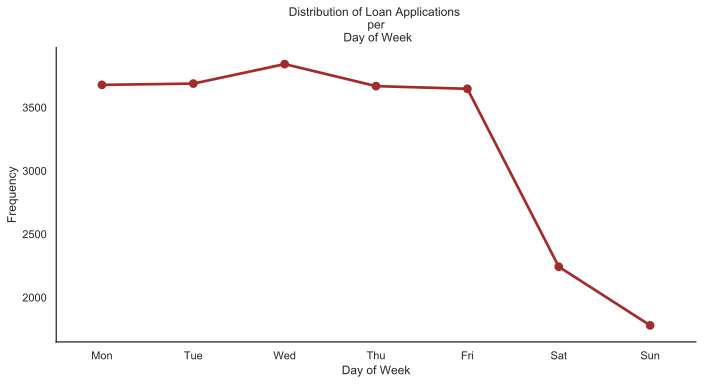

<Figure size 360x360 with 0 Axes>

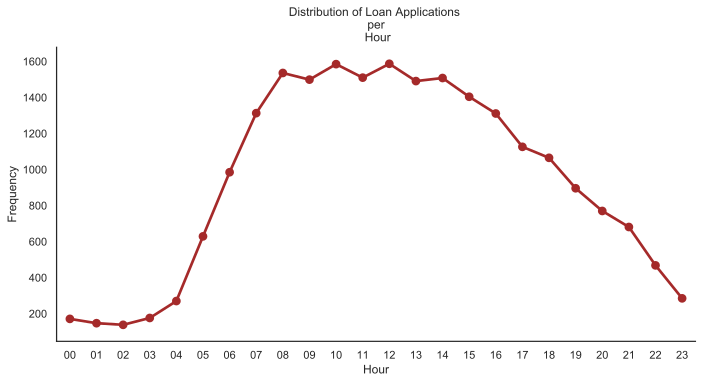

In [16]:
## Generate the variables and the labels
xvars = list(['App_Year','App_Day','App_DoW','App_Hour'])
xlabs = list(['Year','Day of Month','Day of Week','Hour'])

for i in range(len(xvars)):
    
    ## Write the summary table function
    
    summ_table = pd.DataFrame(demo_loans_data.groupby(xvars[i])['customerid'].count().reset_index())
    summ_table.columns = [xlabs[i],'Frequency']
    print(summ_table)
    
    ## Generate a plot
    plt.figure(figsize = (5,5))
    sns.set(font='sans-serif', font_scale=1,style = "white")
    ax = sns.factorplot(x=xlabs[i], y="Frequency", data=summ_table,size=5, aspect=2,color = "brown")
    ax.set(title = "Number of Loans Applied \n per \n "+ xlabs[i],xlabel = xlabs[i],ylabel = "Frequency")
    print(ax)


### Generate a time series graph that shows the number of loans applied, per loan term

   Year Loan Term Days  Frequency
0  2016        15 days       1736
1  2016        30 days       3039
2  2016        60 days        135
3  2017        15 days       5298
4  2017        30 days      11135
5  2017        60 days       1146
6  2017        90 days         62
    Day of Month Loan Term Days  Frequency
0             01        15 days        153
1             01        30 days        438
2             01        60 days         44
3             02        15 days        169
4             02        30 days        487
..           ...            ...        ...
116           30        90 days          2
117           31        15 days        100
118           31        30 days        197
119           31        60 days         24
120           31        90 days          1

[121 rows x 3 columns]
   Day of Week Loan Term Days  Frequency
0          Mon        15 days       1120
1          Mon        30 days       2327
2          Mon        60 days        223
3          Mon        90

<Figure size 360x360 with 0 Axes>

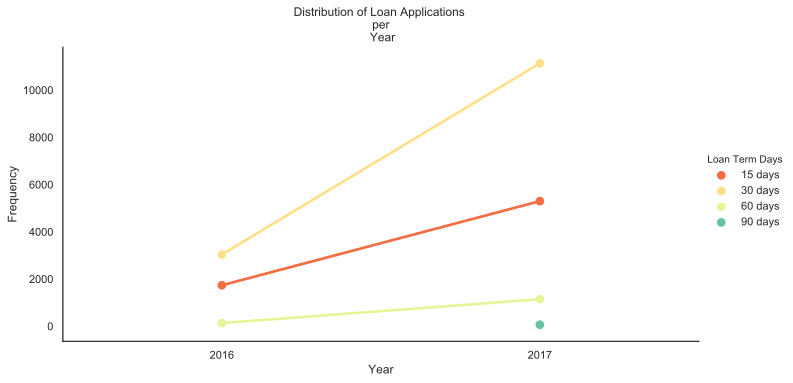

<Figure size 360x360 with 0 Axes>

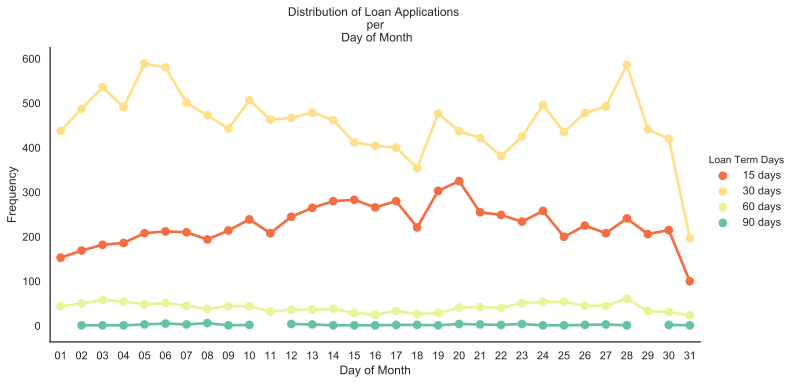

<Figure size 360x360 with 0 Axes>

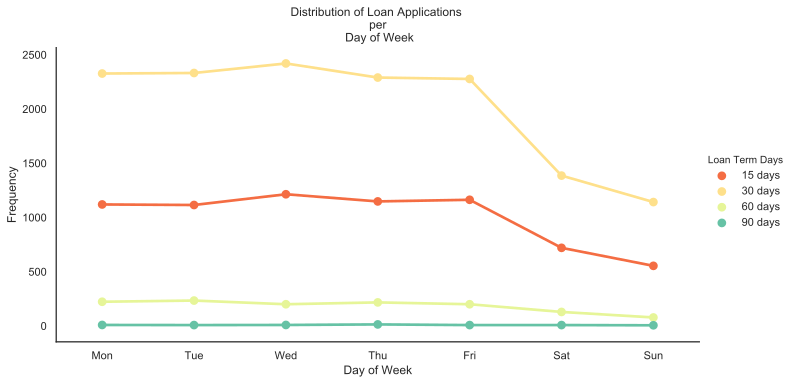

<Figure size 360x360 with 0 Axes>

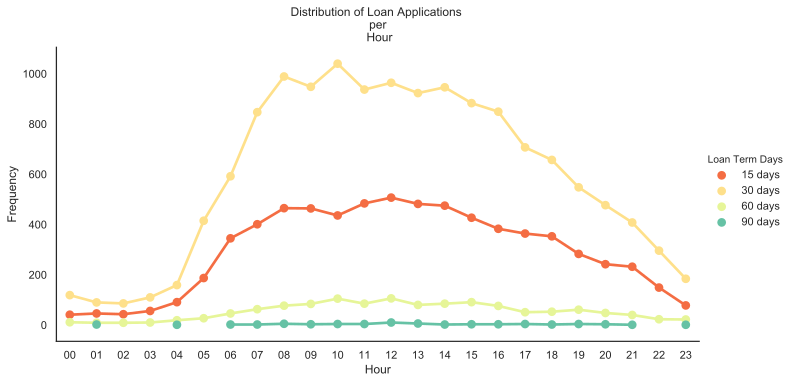

In [17]:
## Add the word 'days' to the loan term days
demo_loans_data['termdays'] = demo_loans_data['termdays'].astype(str)+" days"

## Generate the variables and the labels
xvars = list(['App_Year','App_Day','App_DoW','App_Hour'])
xlabs = list(['Year','Day of Month','Day of Week','Hour'])

for i in range(len(xvars)):
    
    ## Write the summary table function
    
    summ_table = pd.DataFrame(demo_loans_data.groupby([xvars[i],"termdays"])['customerid'].count().reset_index())
    summ_table.columns = [xlabs[i],'Loan Term Days','Frequency']
    print(summ_table)
    
    ## Generate a plot
    plt.figure(figsize = (5,5))
    sns.set(font='sans-serif', font_scale=1,style = "white")
    ax = sns.factorplot(x=xlabs[i], y="Frequency",hue="Loan Term Days", data=summ_table,size=5, aspect=2,palette="Spectral")
    ax.set(title = "Number of Loans Applied \n per \n "+ xlabs[i],xlabel = xlabs[i],ylabel = "Frequency")
    print(ax)